<a href="https://colab.research.google.com/github/JaraSit/notebooks/blob/main/PF_stochastic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Co rozmyslet a vyzkoušet:_

1. Upravit shape a scale parametry, které byly použité pro generování pevnosti na současných 2mm prvcích, tak aby odpovídali pevnosti stresované oblasti 1m. (délka nosníku). Parametry pofovnat s těmi nafitovanými. Vykreslit odpovídající PDF a porovnat s nafitovanou PDF. 

2. Otestovat, zda je FE model invariantní vůči změně velikosti prvku, pokud se pevnost prvku změní podle Weibula.
  - Vzít jinou délku prvku (současna je 2mm, tak např. 1mm a 4mm).
  - Vzít shape a scale, které byly použité pro současnou simulaci s $l_e=2\textrm{ mm}$, a upravit je pro novou $l_e$.
  - Opakovaně vygenerovat pevnosti na prvcích, spustit FE model a vykreslit histogram makroskopických pevností.



# 1D Stochastic phafe-field model

##  Model description

We assume, that 1D beam under tension/compression is modeled as serial connection of individual parallel bundles, see Figure below.

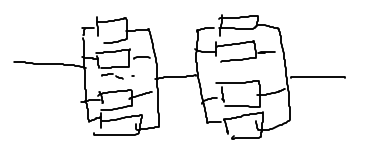

If tensile strength CDF of each bundle is denoted $G_m(x)$, then CDF $H_n(x)$ of structure consist of $n$ serial connected bundles is
$$
H_n(x) = 1 - \left( 1 - G_m(x)\right)^n
$$

**Serial test** - If bundle consist of one cell with following CDF
$$
G_1(x) = 1 - e^{-\frac{l}{n}\left(\frac{x}{\lambda}\right)^k},
$$
where $l/n$ is internal length (length of one element), then structural global CDF of strengths is 
$$
H_n^{\text{serial}}(x) = 1 - e^{-\frac{l\cdot n}{n}\left(\frac{x}{\lambda}\right)^k} = 1 - e^{-l\left(\frac{x}{\lambda}\right)^k}
$$

## PF weights in parallel connection
When localization crack - defined by $d(x)$ - appears in phase-field model, crack distribution $d(x)$ appears such that regularized dissipated crack energy
$$
\mathcal{E}_d = \frac{G_\mathrm{c}}{c_\alpha}\int_0^L \alpha(d) + l_\mathrm{c}|d'(x)|^2\,\mathrm{d}x
$$
is equal to $G_\mathrm{c}$. This energy is not dissipated locally, but is regularized over damage field support. Thus contribution of interval $\langle al_\mathrm{c}, bl_\mathrm{c}\rangle$ is  
$$
\frac{G_\mathrm{c}}{c_\alpha}\int_{al_\mathrm{c}}^{bl_\mathrm{c}} \alpha(d) + l_\mathrm{c}|d'(x)|^2\,\mathrm{d}x.
$$
Without loss of generality suppose that crack appears symetrically. This simplifies following calculations - we assume that each part of crack dissipates $G_\mathrm{c}/2$ and interval $\langle al_\mathrm{c}, bl_\mathrm{c}\rangle$ lies in the same half of crack.

**Pham model** - Parameter $c_\alpha=8/3$ and function $\alpha(d)=d$. Damage profile is
$$
d(x) = \left( 1 - \frac{|x|}{2l_\mathrm{c}}\right)^2
$$
with support $\langle -2l_\mathrm{c}, 2l_\mathrm{c}\rangle$. Contribution of individual interval $\langle al_\mathrm{c}, bl_\mathrm{c}\rangle$ is
$$
\frac{3G_\mathrm{c}}{8l_\mathrm{c}}\int_{al_\mathrm{c}}^{bl_\mathrm{c}} d + l_\mathrm{c}^2|d'|^2 \mathrm{d} x = \frac{3G_\mathrm{c}}{8l_\mathrm{c}}\int_{al_\mathrm{c}}^{bl_\mathrm{c}} 2\left(1 - \frac{x}{2l_\mathrm{c}}\right)^2\,\mathrm{d}x = \frac{3G_\mathrm{c}}{8l_\mathrm{c}}\left[2x - \frac{x^2}{l_\mathrm{c}} + \frac{x^3}{6l_\mathrm{c}^2}\right]_{al_\mathrm{c}}^{bl_\mathrm{c}} = \frac{G_\mathrm{c}}{2}\underbrace{\frac{3}{4}\left(2b - 2a - b^2 + a^2 + \frac{b^3}{6} - \frac{a^3}{6}\right)}_{K_{a,b}},
$$ 
where $K_{a,b}$ is contribution weight.

**Bourdin model** - Parameter $c_\alpha=2$ and function $\alpha(d)=d^2$. Damage profile is
$$
d(x)=e^{-\frac{|x|}{l_\mathrm{c}}}
$$
with support $\langle-\infty, \infty\rangle$. Contribution of individual interval $\langle al_\mathrm{c}, bl_\mathrm{c}\rangle$ is
$$
\frac{G_\mathrm{c}}{2l_\mathrm{c}}\int_{al_\mathrm{c}}^{bl_\mathrm{c}} d^2 + l_\mathrm{c}^2|d'|^2 \mathrm{d} x = \frac{G_\mathrm{c}}{2l_\mathrm{c}}\int_{al_\mathrm{c}}^{bl_\mathrm{c}} 2e^{-\frac{2x}{l_\mathrm{c}}}\,\mathrm{d}x = -\frac{G_\mathrm{c}}{2}\left[e^{-\frac{2x}{l_\mathrm{c}}}\right]_{al_\mathrm{c}}^{bl_\mathrm{c}} = \frac{G_\mathrm{c}}{2}\underbrace{\left(e^{-2a} - e^{-2b}\right)}_{K_{a,b}},
$$ 
where $K_{a,b}$ is contribution weight.

## Phase-field stochastic model

$$
H_n(x) = 1 - (1 - \prod_{i=1}^m F_{l_\mathrm{e}}(K_ix))^{n-m}
$$
$$
F_{l_\mathrm{e}}(x) = 1 - e^{-l_\mathrm{e}\left(\frac{x}{\lambda}\right)^k}, \quad l_\mathrm{e}=l/n
$$

## Regularization test
If 1D structure is discretized by $n$ elements, we assume that crack is smeared over $m<n$ elements. If number of elements is increased to $a\cdot n$, than crack appears over $a\cdot m$ elements 

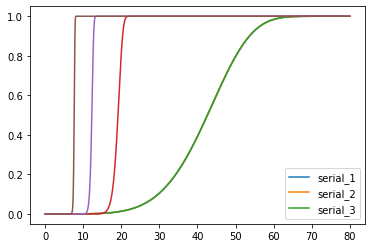

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as ma


def fceF(x_i, l_i, lmbda, k):
  return 1.0 - ma.exp(-l_i*(x_i/lmbda)**k)


def fceH(x_space, n, m):
  H_fce = []
  for xi in x_space:
    H_fce.append(1.0 - (1.0 - fceF(m*xi, 1/n, lmbda, k)**m)**(n-m))
  return H_fce


x_space = np.linspace(0.0, 80.0, 1000)
k = 5.210672891287511
lmbda = 45.68182117559822

H_fce_1 = fceH(x_space, 100, 1)
H_fce_2 = fceH(x_space, 200, 1)
H_fce_3 = fceH(x_space, 400, 1)

H_fce_4 = fceH(x_space, 100, 5)
H_fce_5 = fceH(x_space, 200, 10)
H_fce_6 = fceH(x_space, 400, 20)

#n_1 = 10

#H_1 = []
#H_2 = []
#H_3 = []

#for xi in x_space:
  # m = 200
#  H_1.append(1.0 - (1.0 - fceF(2*xi, lmbda, k)**2)**(100-2))
#  H_2.append(1.0 - (1.0 - fceF(6*xi, lmbda, k)**6)**(300-6))
#  H_3.append(1.0 - (1.0 - fceF(24*xi, lmbda, k)**24)**(1200-24))

plt.plot(x_space, H_fce_1, label="serial_1")
plt.plot(x_space, H_fce_2, label="serial_2")
plt.plot(x_space, H_fce_3, label="serial_3")
plt.plot(x_space, H_fce_4, label="")
plt.plot(x_space, H_fce_5, label="")
plt.plot(x_space, H_fce_6, label="")
plt.legend()
plt.show()

# 1D Phase-fiedl test

Bourdin model

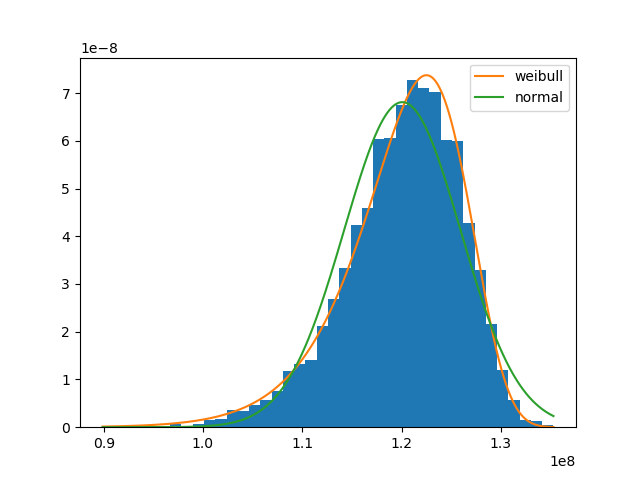

In [ ]:
# Nafitovane ze strukturalni pevnosti z literatury
shape = 5.210672891287511  # shape parametr strukturalni
scale = 45.68182117559822  # scale parametr strukturalni

# Parametry FE modelu
l_stoch = 1 # Delka modelu pro stoch simulaci
n = 500  # Pocet prvku
lc_stoch = 2*l_stoch/n  # lc = 2*le, kde le je delka prvku

# Parametry rozdeleni pevnosti na prvku prepoctene ze strukturalni pevnosti
shape_star = shape  
scale_star = scale*l_stoch**(1.0/shape)*lc_stoch**(-1.0/shape)

print(scale_star, shape_star)

131.80781856590906 5.210672891287511
